In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')

In [8]:
dataset_sample_path = r'datasets\data_sample1.h5'
movie_titles_path = r'datasets\movie_titles.csv'

In [9]:
# df = pd.DataFrame(columns=['MovieID', 'CustomerID', 'Rating', 'Date'])

# for i in range(1, 5):
#     df_sample = pd.read_hdf(f'datasets\\data_sample{i}.h5')
#     df = df.append(df_sample)

In [10]:
# train, test = df.iloc[:int(df.shape[0]*0.8)], df.iloc[int(df.shape[0]*0.8):]

In [11]:
# train.to_hdf(r'datasets\train.h5', key='df')
# test.to_hdf(r'datasets\test.h5', key='df')

In [12]:
train =  pd.read_hdf(r'datasets\train.h5')

In [13]:
#df = pd.read_hdf(dataset_sample_path)
movie_titles = pd.read_csv(movie_titles_path,sep = ",", header = None, names=['MovieID', 'Year_of_Release', 'Movie_Title'], index_col = "MovieID", encoding = "iso8859_2")

In [14]:
train.head()

,MovieID,CustomerID,Rating,Date,Day_of_Week
0,1,1488844,3,2005-09-06,Tuesday
1,1,822109,5,2005-05-13,Friday
2,1,885013,4,2005-10-19,Wednesday
3,1,30878,4,2005-12-26,Monday
4,1,823519,3,2004-05-03,Monday


In [15]:
train.describe()

,MovieID,CustomerID,Rating
count,3.200000e+06,3.200000e+06,3.200000e+06
mean,5.229837e+03,1.321722e+06,3.623891e+00
std,4.204505e+03,7.646556e+05,1.076435e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,1.910000e+02,6.597690e+05,3.000000e+00
50%,4.633000e+03,1.317589e+06,4.000000e+00
75%,9.322000e+03,1.984028e+06,4.000000e+00
max,1.339200e+04,2.649429e+06,5.000000e+00


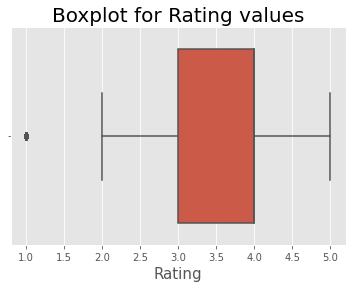

In [16]:
sns.boxplot(train['Rating'].values)
plt.xlabel('Rating', fontsize=15)
plt.title('Boxplot for Rating values', fontsize=20)
plt.show()

We see that ratings of 1 are even taken as outliers in the boxplot

In [17]:
movies_count = train.MovieID.value_counts()
movies_count_values = movies_count.values

In [18]:
customer_count = train.CustomerID.value_counts()
no_movies_per_customer = customer_count.values

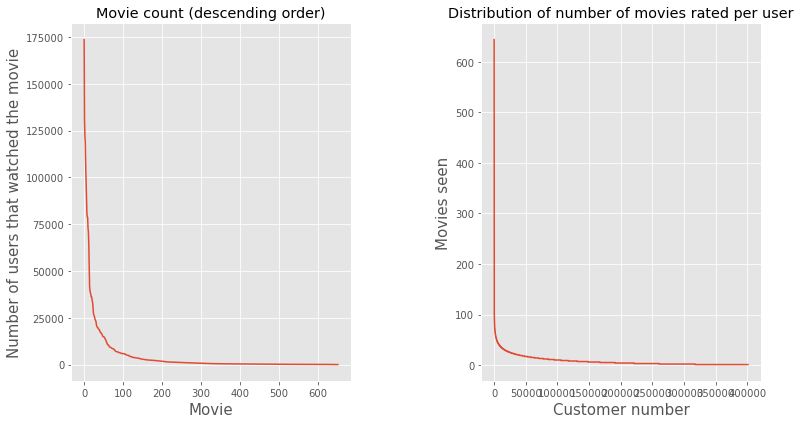

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))

axes[0].plot(movies_count_values)
axes[0].set_title("Movie count (descending order)")
axes[0].set_ylabel('Number of users that watched the movie', fontsize=15)
axes[0].set_xlabel('Movie', fontsize=15)

axes[1].plot(no_movies_per_customer)
axes[1].set_ylabel('Movies seen', fontsize=15)
axes[1].set_xlabel('Customer number', fontsize=15)
axes[1].set_title('Distribution of number of movies rated per user')

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

We see that very few people watch a lot of movies, and some movies are very popular, whereas others are certainly not popular

In [20]:
no_of_rated_movies_per_user = train.groupby(by = "CustomerID")["Rating"].count().sort_values(ascending = False)

In [22]:
# Top 20 movies people watched

In [25]:
top_20_movie_ids = movies_count.keys()[:20]
top_20_movies = movie_titles.loc[top_20_movie_ids]
top_20_movies

,Year_of_Release,Movie_Title
9340,2001.0,Pearl Harbor
4656,2000.0,Erin Brockovich
4640,1988.0,Rain Man
30,2003.0,Something's Gotta Give
4577,1989.0,Steel Magnolias
191,2003.0,X2: X-Men United
175,1992.0,Reservoir Dogs
197,2004.0,Taking Lives
13391,1994.0,True Lies
4590,2004.0,The Forgotten


In [26]:
def to_thousands(tick):
    return ''.join([str(tick/(10**3)),'K'])

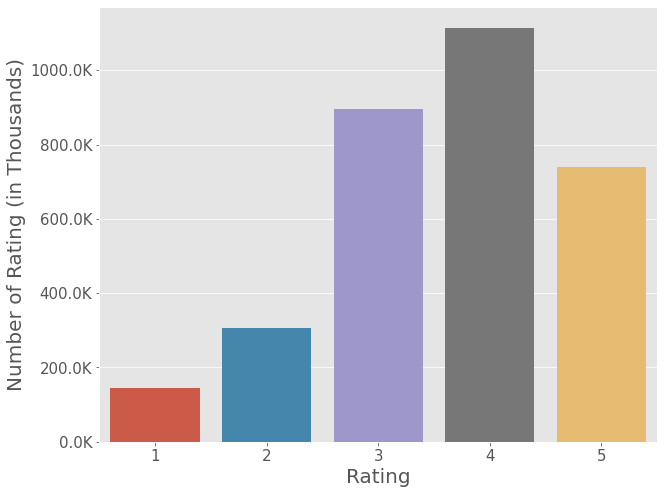

In [27]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(x="Rating", data=train)
ax.set_yticklabels([to_thousands(tick) for tick in ax.get_yticks()])
plt.tick_params(labelsize=15)
plt.ylabel('Number of Rating (in Thousands)', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.show()

Generally, there not many bad movies... or people hardly ever watch bad movies

In [28]:
no_of_rated_movies_per_user = train.groupby(by = "CustomerID")["Rating"].count().sort_values(ascending = False)

In [29]:
no_of_rated_movies_per_user

CustomerID
305344     644
387418     638
2439493    614
1664010    574
2118461    538
          ... 
1207566      1
1207535      1
1207523      1
2168916      1
1896453      1
Name: Rating, Length: 401041, dtype: int64

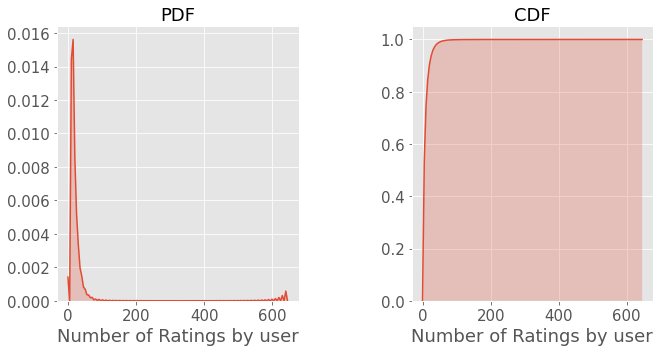

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

sns.kdeplot(no_of_rated_movies_per_user.values, shade = True, ax = axes[0])
axes[0].set_title("PDF", fontsize = 18)
axes[0].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[0].tick_params(labelsize = 15)

sns.kdeplot(no_of_rated_movies_per_user.values, shade = True, cumulative = True, ax = axes[1])
axes[1].set_title("CDF", fontsize = 18)
axes[1].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[1].tick_params(labelsize = 15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

Let's map date strings to datetime types, and create new feature called Day_of_Week

In [ ]:
# train.Date = train.Date.map(lambda x: datetime.strptime(x, "%Y-%m-%d"))
# train['Day_of_Week'] = train.Date.map(lambda x: x.day_name())

In [33]:
train.head(3)

,MovieID,CustomerID,Rating,Date,Day_of_Week
0,1,1488844,3,2005-09-06,Tuesday
1,1,822109,5,2005-05-13,Friday
2,1,885013,4,2005-10-19,Wednesday


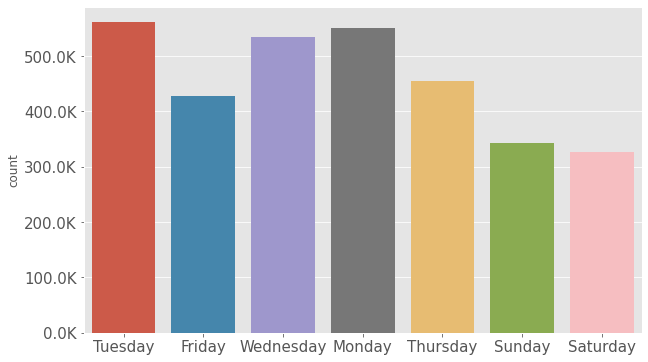

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(train.Day_of_Week.values)
ax.set_yticklabels([to_thousands(tick) for tick in ax.get_yticks()])
ax.tick_params(labelsize = 15)
plt.show()

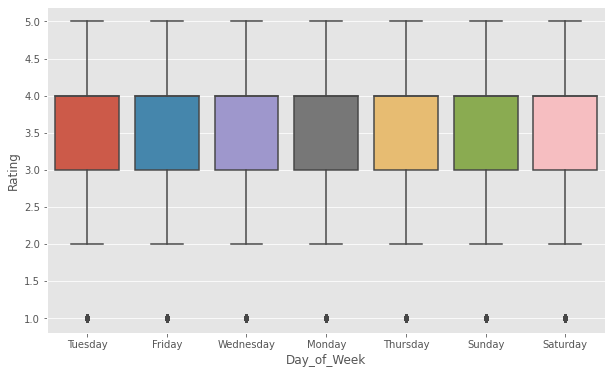

In [35]:
fig = plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='Day_of_Week', y='Rating', data=train)

Day of week does not affect the rating of the customer - even Mondays!

In [36]:
from scipy import sparse

In [38]:
train['CustomerID'] = train['CustomerID'].astype(np.int64)
train['MovieID'] = train['MovieID'].astype(np.int64)
train['Rating'] = train['Rating'].astype(np.int64)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   MovieID      int64         
 1   CustomerID   int64         
 2   Rating       int64         
 3   Date         datetime64[ns]
 4   Day_of_Week  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 186.5+ MB


In [40]:
sparse_data = sparse.csr_matrix((train['Rating'].values, (train['CustomerID'].values, train['MovieID'].values)))

In [41]:
sparse_data

<2649430x13393 sparse matrix of type '<class 'numpy.int64'>'
	with 3200000 stored elements in Compressed Sparse Row format>

In [42]:
no_cells = sparse_data.shape[0] * sparse_data.shape[1]
non_zero = sparse_data.count_nonzero()

In [60]:
percentage = non_zero/no_cells
percentage_str = "{0:,.7f}".format(percentage)

In [61]:
print(f"Percentage of non-zero elements: {percentage_str} %")

Percentage of non-zero elements: 0.0000902 %


In [62]:
sparse_data.shape

(2649430, 13393)

In [78]:
avg_ratings_per_movie = sparse_data.sum(axis=1)

In [79]:
avg_ratings_per_movie.shape

(2649430, 1)

In [80]:
avg_ratings_per_user = sparse_data.sum(axis=0)/(sparse_data.shape[1] - sparse_data.)

In [81]:
avg_ratings_per_user.shape

(1, 13393)

In [82]:
avg_ratings_per_user

matrix([[0.        , 0.00077413, 0.00019476, ..., 0.00048992, 0.1095847 ,
         0.02130043]])

In [83]:
avg_ratings_per_user.shape

(1, 13393)